# Lecture 40 - Principal Component Analysis (PCA)

# Feature Selection & Feature Extraction

Note that feature selection and feature extraction are two different approaches.

1. **Feature Selection:** Choosing a subset of the original pool of features.
    
2. **Feature Extraction:** Creating useful features from data.
    * Dimensionality reduction techniques such as PCA are performing feature extraction.

In **feature selection**, we can have three main approaches:

1. **Wrappers:** a wrapper evaluates a specific model sequentially using different potential subsets of features to get the subset that best works in the end. They are highly costly and have a high chance of overfitting, but also a high chance of success, on the other hand.
    * Example: Forward Sequential Feature Selection, Backward Feature Elimination, etc.

2. **Filters:** for a much faster alternative, filters do not test any particular algorithm, but rank the original features according to their relationship with the problem (labels) and just select the top of them. Correlation and mutual information are the most widespread criteria. There are many easy to use tools, like the [feature selection ```scikit-learn``` package](https://scikit-learn.org/stable/modules/feature_selection.html).

    * Example: Correlation, chi-squared test, ANOVA, information gain, etc.

3. **Embedded:** this group is made up of all the Machine Learning techniques that include feature selection during their training stage. 
    * Example: LASSO, Elastic Net, Ridge, etc.

___

# Principal Component Analysis (PCA)

A very common approach (and one of the simplest approaches) to **dimensionality reduction** is **Principal Component Analysis** (or **PCA**). 

* PCA takes data from *sensor coordinates* to *data centric coordinates* using linear transformations.

PCA uses a **linear transformation** to **minimize the redundancy** of the resulting transformed data (by ending up with data that is uncorrelated).
* This means that every transformed dimension is more informative.
* In this approach, the dimensionality of the space is still the same as the original data, but the space of features are now arranged such that they contain the most information.

If we wish to reduce dimensionality of our feature space, we can choose only the features that carry over the most information in the linearly transformed space.
* In other words, PCA will find the underlying **linear manifold** that the data is embedded in.

**PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one**. 

There are a couple of points-of-view on how to find $A$: 

1. Maximum Variance Formulation
2. Minimum-error Formulation

## 1. PCA as Maximum Variance Formulation

Consider the data $X$ comprised on $N$ data samples in a D-dimensional space, so $X$ is a matrix of size $D\times N$.

The **first step** in PCA is to centralize or demean $X$. This will is to guarantee that all features will have the same impact and not weight more only because their range of values is much larger (example, age vs income).

* Without loss of generality, let's assume that we subtracted the mean to the input data, $X$. Now, $X$ has zero mean.

The **second step** is to find the linear transformation $A$ that transforms $X$ to a space where features are:
1. Uncorrelated (preserve all dimensions)
2. reduced (dimensionality reduction)

\begin{align*}Y = AX\end{align*}

where $A$ is a $D\times D$ matrix, $X$ is a $D\times N$ data matrix and therefore $Y$ is also a $D\times N$ transformed data matrix.

The variance of the transformed data $Y$ is given by:

\begin{align*}
R_y &= E[YY^T] \\
&= E[AX(AX)^T] \\
&= E[AXX^TA^T] \\
&= AE[XX^T]A^T \\
&= AR_xA^T
\end{align*}

Note that we are computing the variance along the dimensions of $Y$, therefore, $R_y$ is a $D\times D$ matrix. Similarly, $R_X$ represents the covariance of the data $X$. Covariances matrices are symmetric therefore $R_X=R_X^T$ and $R_Y=R_Y^T$.

Similarly, $R_X$ represents the covariance of the data $X$. 

If we write $A$ in terms of vector elements:

\begin{align*}A = \left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]\end{align*}

Then,

\begin{align*}
R_y &= \left[\begin{array}{c}a_{1}\\a_{2}\end{array}\right] R_X \left[\begin{array}{cc}a_{1} & a_{2}\end{array}\right] \\
&= \left[\begin{array}{cc} a_1 R_X a_1^T & a_1 R_X a_2^T\\ a_2 R_X a_1^T & a_2 R_X a_2^T\end{array}\right]
\end{align*}

* If we want to represent the data in a space in which the features are **uncorrelated**, what shape does the covariance matrix have to take?

Diagonal! Why?

* Can we use the eigenvectors of $R_X$ as our linear transformation $A$?

Consider the case where we are trying to project the data $X$ into a 1-dimensional space, so we are trying to find the direction $a_1$ where maximal data variance is preserved:

\begin{align*}
\arg_{a_1} \max a_1 R_X a_1^T\end{align*}

We want this solution to be bounded (considering $a_1 = \infty$ would maximize), so we need to constraint the vector to have norm 1

\begin{align*}\Vert a_1\Vert_2^2 = 1 \iff a_1 a_1^T = 1\end{align*}

Then, we using Lagrange Optimization:

\begin{align*}\mathcal{L} = a_1 R_X a_1^T + \lambda_1 (1-a_1 a_1^T)\end{align*}

Solving for $a_1$:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial a_1} &= 0 \\
R_X a_1^T + R_X^T a_1^T - 2\lambda_1 a_1^T &= 0 \\
R_X a_1^T = \lambda a_1^T
\end{align*}

* Does this look familiar?

This is stating that $a_1^T$ must be an eigenvector of $R_X$!

So coming back to the question "Can we use the eigenvectors of $X$ as our linear transformation $A$?" YES!

* If we left multiply by $a_1$ and make use of $a_1a_1^T = 1$:

\begin{align*}a_1 R_X a_1^T = \lambda_1\end{align*}

**So the variance will be maximum when we set the project direction $a_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$**.

* This eigenvector is known as the firt **principal component**.

* As you may anticipate, the linear trasnformation $A$ will the be a matrix whose row entries are **sorted** the eigenvectors (sorted by their correspondent eigenvalue).

\begin{align*}A &= \left[\begin{array}{c}
\overrightarrow{a_{1}}\\
\overrightarrow{a_{2}}
\end{array}\right]\end{align*}

where $a_1$ and $a_2$ are eigenvectors of $R_X$ with correspondent eigenvalues $\lambda_1$ and $\lambda_2$ with $\lambda_1>\lambda_2$.

## 2. PCA as Minimum-error Formulation

We can also look at PCA as a minimization of mean squared error.

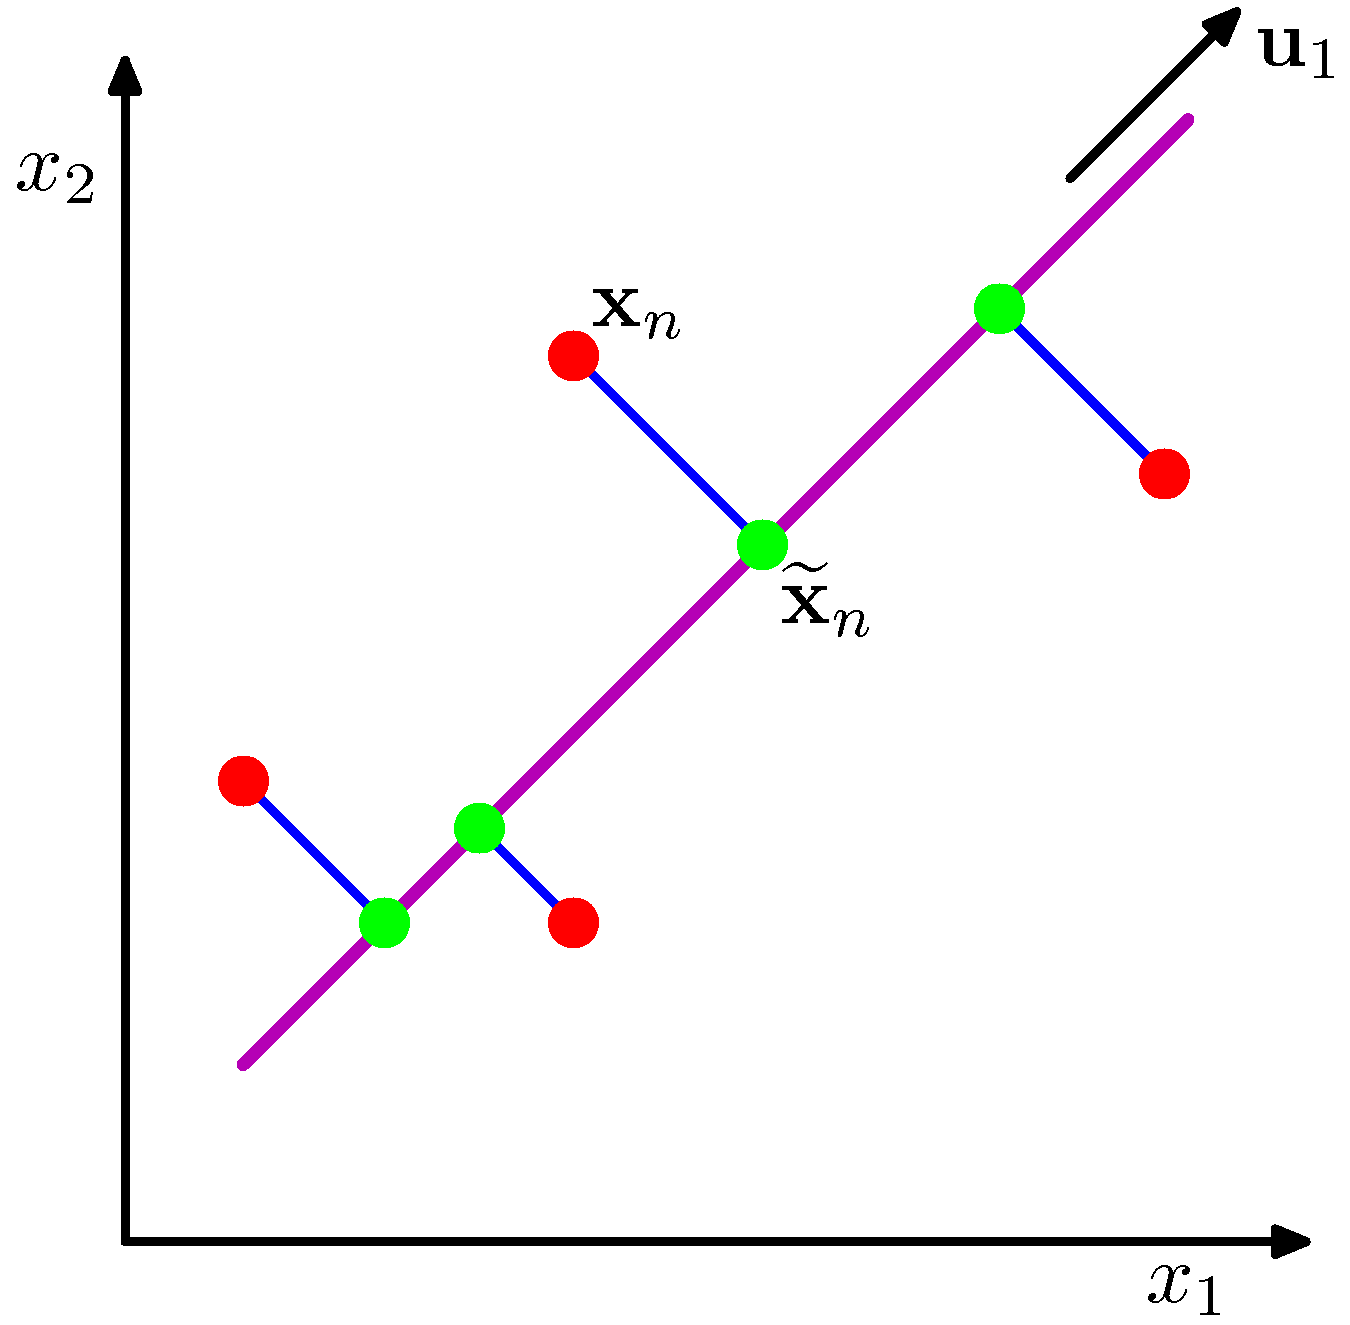

In [1]:
from IPython.display import Image
Image('figures/Figure12.2.png',width=300)

Consider $X$ and a D-dimensional orthogonal basis $\mathbf{u}$:

\begin{align*}\hat{x} = \sum_{i=1}^m y_i a_i\end{align*}

where $m<D$.

\begin{align*}y_j = x^Ta_j \end{align*}

where $A^TA = I$.

We want to minimize the residual error:

\begin{align*}\epsilon = x - \hat{x} = \sum_{i=m+1}^D y_i a_i\end{align*}

* The objective function we will use is the mean square residual:

\begin{align*}
J &= E\left[ \|\epsilon\|^2_2\right]\\
&= E\left[\left( \sum_{i=m+1}^D y_ia_i\right)\left( \sum_{i=m+1}^D y_i a_i\right) \right]\\
&=\sum_{j=m+1}^D E [y_j^2]\\
&=\sum_{j=m+1}^D E [(a_j^T\mathbf{x})(\mathbf{x}^Ta_j)]\\
&= \sum_{j=m+1}^D a_j^T E[\mathbf{x}\mathbf{x}^T]a_j\\
&= \sum_{j=m+1}^D a_j^T R_x a_j
\end{align*}

Minimize the error and incorporate Lagrange parameters for $U^TU=I$:

\begin{align*}
\frac{\partial J}{\partial a_j} &= 2(R_x a_j - \lambda_j a_j) = 0\\
R_x a_j &= \lambda_j a_j
\end{align*}

So, the sum of the error is the sum of the eigenvalues of the unused eigenvectors.  So, we want to select the eigenvectors with the $m$ largest eigenvalues. 

___

# Steps of PCA

Consider the data $X$:

1. Subtract the mean $\mu = \frac{1}{N}\sum_{i=1}^N x_i$

2. Compute the covariance matrix $R_X$ (by definition, the covariance already subtracts the data's mean)

3. Compute eigenvectors and eigenvalues of the matrix $R_X$, and store the sorted eigenvectors ($e_i$) in decreasing eigenvalue ($\lambda_i$) order.

4. The linear transformation $A$ will be: $A = \left[\begin{array}{c} \mathbf{a_{1}}\\ \mathbf{a_{2}} \end{array}\right]$, where $\lambda_1 > \lambda_2$

5. Projection: $y=Ax$

Note that the formal definition of covariance already accounts for demeaning the data.

In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def PCA(X, m, display=1):
    '''This function implements PCA. The data matrix X is DxN matrix, 
    where D is the dimension and N the number of points'''
    
    D, N = X.shape
    
    # Demean the Data
    data = X - X.mean(axis=1).reshape(-1, 1)
    
    # Covariance of the input data X
    cov_mat = np.cov(data)
    
    # Find eigenvectors and eigenvalues 
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    # Sort eigenvectors by magnitude of eigenvalues
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

    # Linear transformation
    A = np.hstack(([eigen_pairs[i][1][:, np.newaxis] for i in range(m)]))
    
    #compute explained variance and plot
    cum_var_exp=0
    if display:
        total = sum(eigen_vals)
        var_explained = [(i/total) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_explained)
        plt.bar(range(1,D+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1,D+1), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.show();
    return A, eigen_pairs, cum_var_exp

## Example: Half-Moons

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, random_state = 123)

plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
# TO BE FINISHED IN CLASS

plt.scatter(projection_PCA, np.zeros(len(projection_PCA)), c=y)
plt.title('PCA Projection', fontsize=15);

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA(n_components=1)
projection_LDA = model.fit_transform(X,y)

plt.scatter(projection_LDA, np.zeros(len(projection_LDA)), c=y)
plt.title('LDA Projection', fontsize=15);

## Example: Synthetic oval-shaped data

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1500,centers=2,cluster_std=2.5) 
X    = np.dot(X, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
plt.scatter(X[y==0,0],X[y==0,1],c='r')
plt.scatter(X[y==1,0],X[y==1,1],c='b');

In [ ]:
A,_,_ = PCA(X.T,1,0)
projection_PCA = X@A

model = LDA(n_components=1)
projection_LDA = model.fit_transform(X,y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(projection_PCA[y==0], np.zeros(len(projection_PCA[y==0])), c='r')
plt.scatter(projection_PCA[y==1], 0.01+np.zeros(len(projection_PCA[y==1])), c='b')
plt.ylim([-0.1,0.1]);plt.title('PCA Projection', fontsize=15);
plt.subplot(122)
plt.scatter(projection_LDA[y==0], np.zeros(len(projection_LDA[y==0])), c='r')
plt.scatter(projection_LDA[y==1], 0.01+np.zeros(len(projection_LDA[y==1])), c='b')
plt.ylim([-0.1,0.1]); plt.title('LDA Projection', fontsize=15);

## Example: Wine Dataset

https://archive.ics.uci.edu/ml/datasets/wine

In [2]:
from sklearn.datasets import load_wine

wine_data = load_wine(return_X_y=False)
# print(wine_data.DESCR)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = wine_data.data
y = wine_data.target

sc = StandardScaler()
X = sc.fit_transform(X)

print(X.shape, y.shape)

In [ ]:
A, _, cum_var_exp= PCA(X.T,2,1)

projection = X@A

In [ ]:
cum_var_exp

In [ ]:
np.where(cum_var_exp>=0.9)[0]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(projection[:, 0], projection[:, 1], c=y)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15);

## Example: MNIST Dataset Handwritten Digits

(http://yann.lecun.com/exdb/mnist/)

In [ ]:
from keras.datasets import mnist

(images, labels), (images_test, labels_test) = mnist.load_data()

images = images/255.
images_test = images_test/255.
print(images.shape,labels.shape,images_test.shape,labels_test.shape)

In [ ]:
plt.figure(figsize=(15,5))
for i in range(15):
    idx = npr.choice(len(images),size=1)
    plt.subplot(3,5,i+1)
    plt.imshow(np.squeeze(images[idx,:,:],axis=0), cmap='gray')
    plt.title(labels[idx][0])
    plt.axis('off');

In [ ]:
# Flattening image into vector
N,D,_ = images.shape
Ntest,D,_ = images_test.shape

X = images.flatten().reshape(N, D*D)
X_test = images_test.flatten().reshape(Ntest, D*D)

X.shape, X_test.shape

In [ ]:
A, eigen_pairs, cum_var_exp = PCA(X.T,2,0)

y = X@A

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('MNIST Top 9 Eigenvectors', size=16)
for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.real(eigen_pairs[i][1].reshape(28,28)),cmap='gray')
        plt.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(np.real(y[:, 0]), np.real(y[:, 1]), c=labels, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10));

## Recap

PCA is an **unsupervised** model that can be used to:

1. Perform Dimensionality Reduction, by projecting data into directions with maximum explained variance
2. Uncorrelate Data, by rotating the data space such that data becomes uncorrelated

PCA uses **linear transformations** (projections or rotations) of the input data $X$:

$$Y=AX$$

where $A$ is a $D\times D$ linear transformation matrix, $X$ is an $D\times N$ data matrix, and $Y$ is a $D\times N$ transformed data matrix.

Therefore PCA will work well when the relationship between features are linear. Moreover, PCA is unsupervised because it **does not** use the class labels to find vector projections (or rotations). So the projections may not necessarily be in the direction that maximize class separability.

PCA can be formulated from two points-of-view:
1. Maximum explained variance
2. Minimum reconstruction error

## Kernel PCA

There are other variants of PCA such as **Kernel PCA**, where we first project the data to a space where classes are linearly separable (RBF kernel) and then apply PCA:

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, noise=0.1, factor=0.2)
plt.scatter(X[:,0],X[:,1],c=y);

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

model_pca = PCA(n_components=1)
proj = model_pca.fit_transform(X)

model_kpca = KernelPCA(n_components=1,kernel='rbf',gamma=2)
proj_kpca = model_kpca.fit_transform(X)

plt.figure(figsize=(15,5))
plt.subplot(121); plt.scatter(proj,np.ones(len(proj)),c=y)
plt.title('PCA Projection', size=15)
plt.subplot(122); plt.scatter(proj_kpca,np.ones(len(proj_kpca)),c=y)
plt.title('Kernel PCA Projection with RBF kernel',size=15);

___

# Manifold Learning

As we have already noted, many natural sources of data correspond to low-dimensional, possibly noisy, non-linear manifolds embedded within the higher dimensional observed data space. Capturing this property explicitly can lead to improved density modelling compared with more general methods.

PCA and LDA are often used to project a data set onto a lower-dimensional space. However both of then assume that the data samples *live* in an underlying linear manifold.

There are other dimensionality reduction techniques that do not assume the manifold is linear. They include:

1. **Multi-Dimensional Scaling (MDS)**

2. **Isometric Mapping (ISOMAP)**

3. **Locally Linear Embedding (LLE)**

# MultiDimensional Scaling (MDS)

Another linear technique with a similar aim is **multidimensional scaling**, or **MDS**. It finds a low-dimensional projection of the data such as to preserve, as closely as possible, the pairwise distances between data points, and involves finding the eigenvectors of the distance matrix. In the case where the distances are Euclidean, it gives equivalent results to PCA. Therefore, MDS is a generalization of PCA.

Consider a set of mean-centered observations $X=\{x_1,x_2,\dots,x_N\}$ where $x_i\in\mathbb{R}^D$. By mean-centered samples $X$, I mean that $\mu_j = \sum_{i=1}^N x_{ij} = 0, \forall j=1,2,\dots,D$.

Consider the **proximity matrix** $D$ that stores pairwise distances of data points $d_{ij} = \text{distance}(x_i,x_j)$:

$$D = \left[\begin{array}{cccc}
d_{11} & d_{12} & \cdots & d_{1N}\\
d_{21} & d_{22} & \cdots & d_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
d_{N1} & d_{N2} & \cdots & d_{NN}
\end{array}\right]$$

Note that $D$ is an $N\times N$ symmetric matrix.

A proximity matrix is:
* A *metric* if 
    1. $d_{ii}=0$
    2. $d_{ij}\geq 0, i\neq j$
    3. $d_{ij} = d_{ji},\forall i,j$
    4. $d_{ij} \leq d_{ik} + d_{jk},\forall i,j,k$ (triangle inequality).
* *Euclidean* if there exists a configuration of points in Euclidean space with the same $d_{ij}$ values.

Given an assumed Euclidean proximity matrix, $D$, the **goal** of MDS is to find a set of points, $Y$, that have the same proximity matrix in an M-dimensional space, where $M<D$.

Let:

$$B = YY^T = \left[\begin{array}{c} y_{1}\\ y_{2}\\ \vdots\\ y_{N} \end{array}\right]\left[\begin{array}{cccc}
y_{1}^{T} & y_{2}^{T} & \cdots & y_{N}^{T}\end{array}\right]=\left[\begin{array}{cccc}
y_{1}y_{1}^{T} & y_{1}y_{2}^{T} & \cdots & y_{1}y_{N}^{T}\\
y_{2}y_{1}^{T} & y_{2}y_{2}^{T} & \cdots & y_{2}y_{N}^{T}\\
\vdots & \vdots & \ddots & \vdots\\
y_{N}y_{1}^{T} & y_{N}y_{2}^{T} & \cdots & y_{N}y_{N}^{T}
\end{array}\right]$$

Then $$b_{ij} = \sum_{k=1}^M y_{ik}y_{jk}$$

* So, if we want to find $B$, then we can determine $Y$ by taking: 

$$Y\approx B^{1/2}$$

since $B=YY^T$.

* The squared Euclidean distance between points of M-dimensional data $Y$ can be written in terms of $B$:

\begin{align*}
d_{ij}^2 &= (y_i - y_j) (y_i - y_j)^T \\
&= (y_i - y_j) (y_i^T - y_j^T) \\
&= y_iy_i^T - y_iy_j^T -y_jy_i^T + y_jy_j^T \\
&= y_iy_i^T - 2 y_iy_j^T + y_jy_j^T \\
&= b_{ii} - 2 b_{ij} + b_{jj} \\
\end{align*}

* Note that if we *translate* or *rotate* the data, we get the same proximity matrix! 

* Let's add some constraints to our transformed data: constraint data $Y$ to have mean zero for all dimensions, which is to say, $\sum_{i=1}^N y_{ik} = 0, \forall k$.

* This implies that each row and column of $B$ sum to 0. Proof:

$$\sum_{j=1}^N b_{ij} = \sum_{j=1}^N\sum_{k=1}^M y_{ik}y_{jk} = \sum_{k=1}^M y_{ik} \left(\sum_{j=1}^N y_{jk}\right) = 0 \text{ (sum of columns)} $$

$$\sum_{i=1}^N b_{ij} = \sum_{i=1}^N\sum_{k=1}^M y_{jk}y_{ik} = \sum_{k=1}^M y_{ik} \left(\sum_{j=1}^N y_{jk}\right) = 0 \text{ (sum of rows)} $$

Given this, we have:

\begin{align*}
\sum_{i=1}^N d_{ij}^2 &= \sum_{i=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = \sum_{i=1}^N b_{ii} + \sum_{i=1}^N b_{jj} - \sum_{i=1}^N 2b_{ij} = T + Nb_{jj}\\
\iff b_{jj} &= \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - T\right) = \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

\begin{align*}
\sum_{j=1}^N d_{ij}^2 &= \sum_{j=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = \sum_{j=1}^N b_{ii} + \sum_{j=1}^N b_{jj} - \sum_{j=1}^N 2b_{ij} = T + Nb_{ii}\\
\iff b_{ii} &= \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - T\right) = \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

\begin{align*}
\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2 &= \sum_{i=1}^N\sum_{j=1}^N (b_{ii} + b_{jj} - 2b_{ij}) = 2NT \\
\iff T &= \frac{1}{2N} \sum_{i=1}^N\sum_{j=1}^N d_{ij}^2
\end{align*}

where $T = \text{trace}(B) = \sum_{i=1}^N b_{ii}$.


* Coming back to proximity matrix, $D$:
\begin{align*}
d_{ij}^2 &= b_{ii} - 2 b_{ij} + b_{jj} \\
d_{ij}^2 &= \frac{1}{N}\left(\sum_{j=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right) - 2b_{ij} + \frac{1}{N}\left(\sum_{i=1}^N d_{ij}^2 - \frac{1}{2N}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right) \\
2b_{ij} &= -d_{ij}^2 + \frac{1}{N}\sum_{j=1}^N d_{ij}^2 + \frac{1}{N}\sum_{i=1}^N d_{ij}^2 - \frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2 \\
b_{ij} &= -\frac{1}{2} \left(d_{ij}^2 - \frac{1}{N}\sum_{j=1}^N d_{ij}^2 - \frac{1}{N}\sum_{i=1}^N d_{ij}^2 + \frac{1}{N^2}\sum_{i=1}^N\sum_{j=1}^N d_{ij}^2\right)
\end{align*}

* So, now, we can estimate $B$ using the proximity matrix $D$. In a matrix form, we can write:

$$B = -\frac{1}{2} JD^{2}J$$

where $J = I - \frac{1}{N}\mathbf{1}\mathbf{1}^T$, $I$ is an $N\times N$ identity matrix, $\mathbf{1}$ is an $N\times 1$ vector of 1's and $D^{2} = \left[d_{ij}^2\right]$ is the proximity matrix of size $N\times N$.

* Recall that for any real symmetruc matrix $B$, the eigenvalues are real and the eigenvectors can be chosen such that they are orthogonal to each other. Thus a real symmetric matrix $B$ can be described in the eigenspace, as follows:

$$B=V\Lambda V^T$$

where $V$ is an orthogonal matrix containing the eigenvectors of $B$ and $\Lambda$ is a diagonal matrix containing the eigenvalues of $B$.

Then we can estimate $Y$ as follows:

$$Y = B^{1/2} = V\Lambda^{1/2}$$

keeping only the $M$ dimensions of interest ($M<D$) corresponding to the $M$ largest eigenvalues.

* Note: If we use the Euclidean distance to compute $D$ then MDS is equivalent to PCA! However, $D$ can be computed with any metric and therefore, MDS is a generalization of PCA.

### Steps to Implement MDS

The MDS algorithm:

1. Compute the distance/proximity matrix, $D$.
2. Compute $D^2$.
3. Compute $J = I - \frac{1}{N}\mathbf{1}\mathbf{1}^T$
4. Compute $B = -\frac{1}{2} JD^{2}J$
5. Compute eigenvectors, $V$, and eigenvalues,$\Lambda$, of $B$. (store them in a matrix in decreasing eigenvalue order.)
6. Compute $Y = V\Lambda^{1/2}$